# Atividade 1

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## Definindo os parâmetros globais e funções

Definindo os digítos finais do RA que serão utilizados em diversas questões.

In [5]:
d4 = 0
d3 = 5
d2 = 7
d1 = 6

Função para gerar uma gaussiana top.

In [23]:
def gerarGaussiana(de, ate, passo, media, desvPad):
    eixoX = np.arange(de, ate, passo)
    return eixoX, (1/(desvPad*(2*np.pi)**(1/2))) * np.e**((-1/2)*((eixoX-media)/desvPad)**2)

## Questão 2

In [28]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d1
desvPadpXWa = 1
mediapXWb   = d1 + 2
desvPadpXWb = 1

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(2, 10, 0.001, mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(4, 12, 0.001, mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

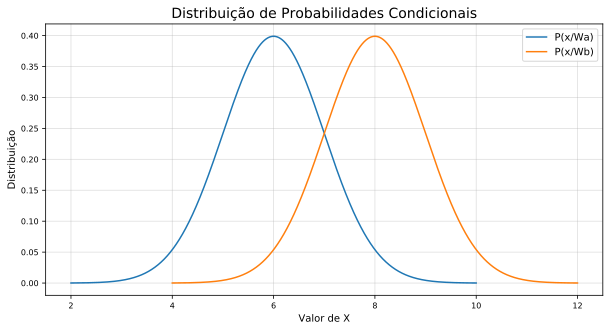

In [30]:
plt.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
plt.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
plt.title("Distribuição de Probabilidades Condicionais")
plt.xlabel("Valor de X")
plt.ylabel("Distribuição")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

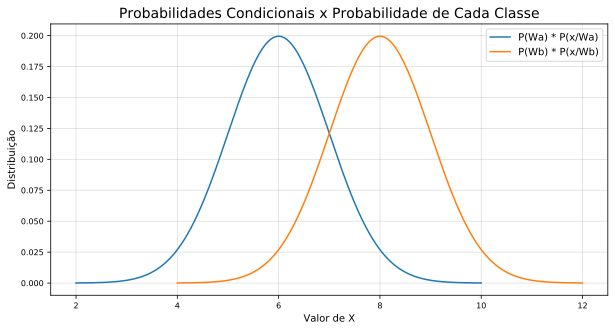

In [31]:
plt.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
plt.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
plt.title("Probabilidades Condicionais x Probabilidade de Cada Classe")
plt.xlabel("Valor de X")
plt.ylabel("Distribuição")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

Pelo método gráfico, verifica-se que o limite de decisão é 7. Abaixo desse valor, escolha a classe A, acima, a classe B.

## Questão 3

In [39]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d2
desvPadpXWa = 1
mediapXWb   = d2
desvPadpXWb = 4

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(-7, 21, 0.001, mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(-7, 21, 0.001, mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

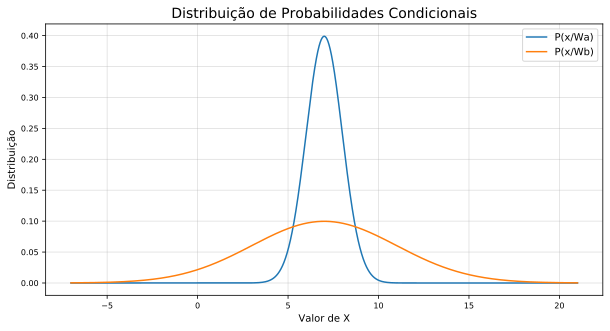

In [40]:
plt.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
plt.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
plt.title("Distribuição de Probabilidades Condicionais")
plt.xlabel("Valor de X")
plt.ylabel("Distribuição")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

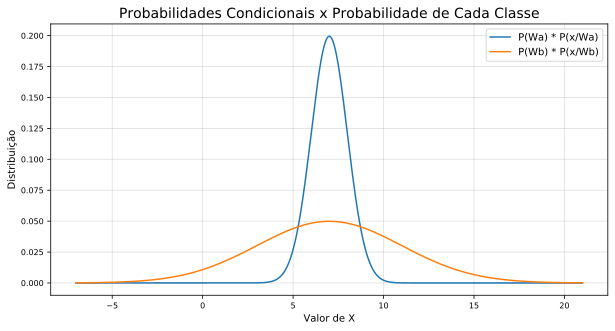

In [41]:
plt.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
plt.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
plt.title("Probabilidades Condicionais x Probabilidade de Cada Classe")
plt.xlabel("Valor de X")
plt.ylabel("Distribuição")
plt.legend()
plt.grid(alpha=0.4)
plt.show()